<a href="https://colab.research.google.com/github/Ranjali12/DeeployCV/blob/main/Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload two images
uploaded = files.upload()

# Load images
image_names = list(uploaded.keys())
image1 = cv2.imread(image_names[0])
image2 = cv2.imread(image_names[1])

# Resize images to ensure they have the same size
image1 = cv2.resize(image1, (300, 300))
image2 = cv2.resize(image2, (300, 300))

print("Images uploaded and resized successfully!")


Saving The Pyramids of Giza.jpg to The Pyramids of Giza (1).jpg
Saving great wall of china.jpg to great wall of china (1).jpg
Images uploaded and resized successfully!


In [4]:
def high_pass_filter(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])  # Sharpening kernel
    high_pass = cv2.filter2D(image, -1, kernel)
    return high_pass

# Apply high-pass filter to the first image
high_pass_image = high_pass_filter(image1)


In [5]:
def low_pass_filter(image, kernel_size=11):
    low_pass = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return low_pass

# Apply low-pass filter to the second image
low_pass_image = low_pass_filter(image2)


In [6]:
def combine_images(high_pass, low_pass, alpha=0.5, beta=0.5):
    combined = cv2.addWeighted(high_pass, alpha, low_pass, beta, 0)
    return combined

# Combine the two images
combined_image = combine_images(high_pass_image, low_pass_image)


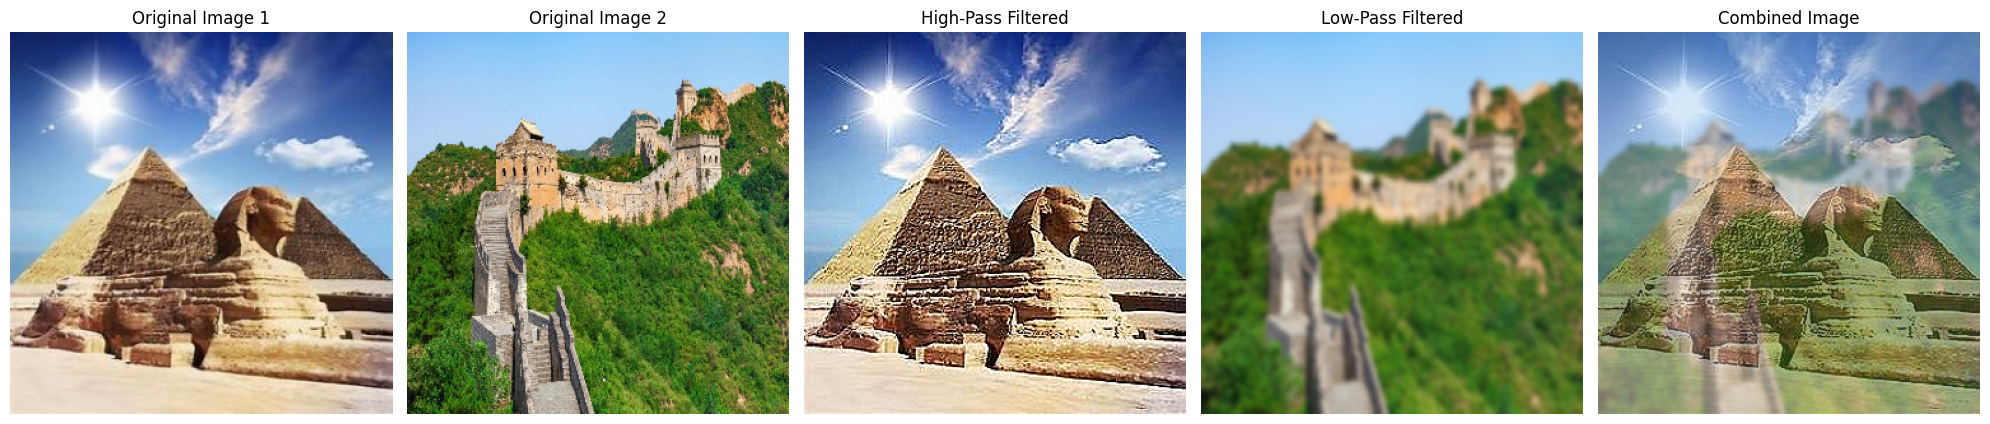

In [7]:
def display_images(images, titles):
    fig, axes = plt.subplots(1, 5, figsize=(20, 8))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# List of images and titles
images = [image1, image2, high_pass_image, low_pass_image, combined_image]
titles = ["Original Image 1", "Original Image 2",
          "High-Pass Filtered", "Low-Pass Filtered", "Combined Image"]

# Display the images
display_images(images, titles)
